C:\Users\tsepu\AppData\Local\Temp\ipykernel_15848\3958980754.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Surface'] = np.log(df['Surface of the land(or plot of land)'])


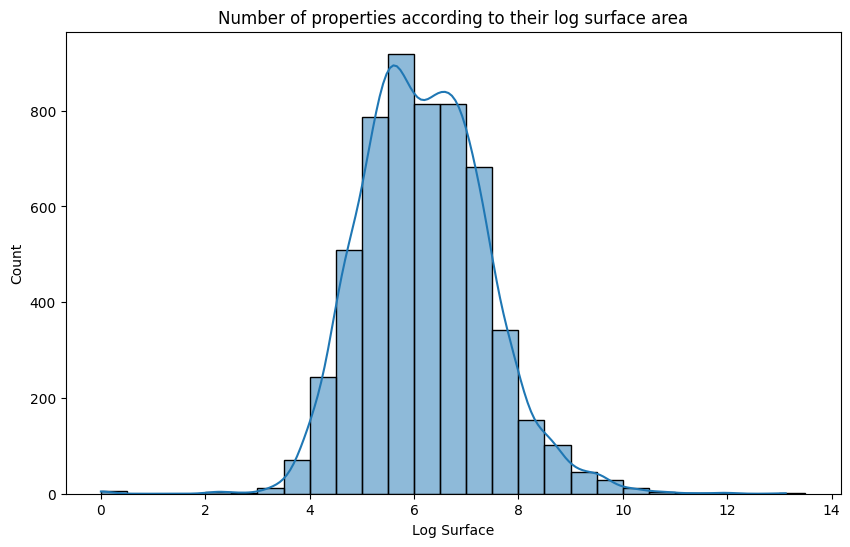

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def load_data(path):
    df = pd.read_csv(path)
    return df

def clean_data(df):
    df = df.drop_duplicates()
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    return df

def fill_missing_values(df):
    df.loc[:, df.dtypes == np.float64] = df.loc[:, df.dtypes == np.float64].fillna(0)
    df.loc[:, df.dtypes == np.int64] = df.loc[:, df.dtypes == np.int64].fillna(0)
    df.loc[:, df.dtypes == object] = df.loc[:, df.dtypes == object].fillna('unknown')
    return df

def visualize_surface_histogram(df):
    """
    Visualize the number of properties according to their surface area using a histogram with Seaborn.

    Parameters:
    df (DataFrame): The DataFrame to visualize.

    Returns:
    None
    """
    # Remove zeros (can't take log of zero)
    df = df[df['Surface of the land(or plot of land)'] > 0]

    # Apply log transformation
    df['Log Surface'] = np.log(df['Surface of the land(or plot of land)'])

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Log Surface', kde=True, binwidth=0.5)  # here we specify binwidth
    plt.title('Number of properties according to their log surface area')
    plt.show()



if __name__ == "__main__":
    df = load_data("property_data.csv")
    df = clean_data(df)
    df = fill_missing_values(df)
    visualize_surface_histogram(df)
